# **Curso de Estatística - Hands on**


# **Atividade 1: Demonstrando o Teorema Central do Limite**

Faça um código que gera uma distribuição uniforme.

Em seguida, implemente no código a soma de 5 destas variáveis e plote para ver a distribuição da soma se aproximar de uma gaussiana.



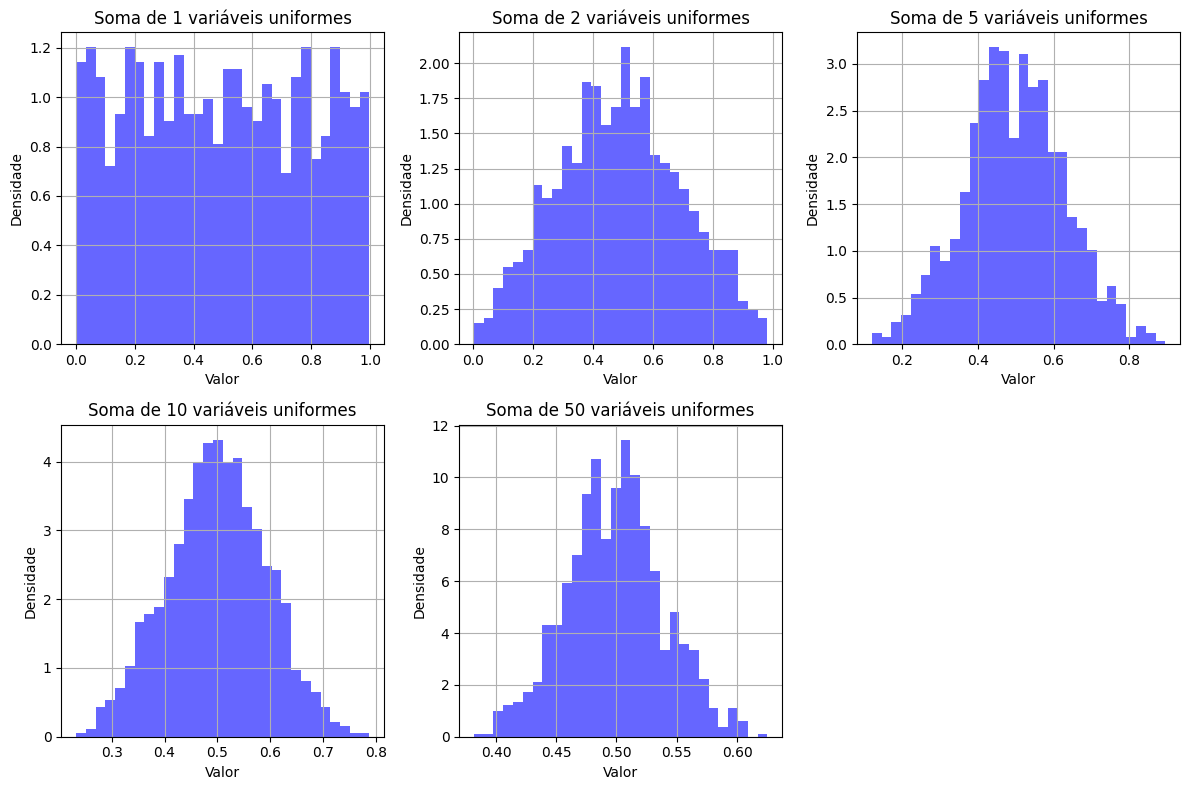

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Simulação de variáveis aleatórias uniformemente distribuídas
np.random.seed(42)

# Parâmetros
n_variaveis = 1000  # Número de amostras
n_somas = [1, 2, 5, 10, 50]  # Diferentes quantidades de variáveis somadas

# Gerar as amostras
uniform_samples = np.random.uniform(0, 1, (n_variaveis, max(n_somas)))

# Configurar gráfico
plt.figure(figsize=(12, 8))

# Plotar histogramas para diferentes números de somas
for i, n in enumerate(n_somas, 1):
    somas = np.sum(uniform_samples[:, :n], axis=1) / n  # Média das variáveis somadas
    plt.subplot(2, 3, i)
    plt.hist(somas, bins=30, density=True, alpha=0.6, color='b')
    plt.title(f'Soma de {n} variáveis uniformes')
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.grid(True)

plt.tight_layout()
plt.show()

# **Atividade 2: Distribuições de probabilidade - Fazendo alguns plots e fits**


## **Distribuição Binomial**

Plote a curva de uma distribuição Binomial para diferentes valores de probabilidade

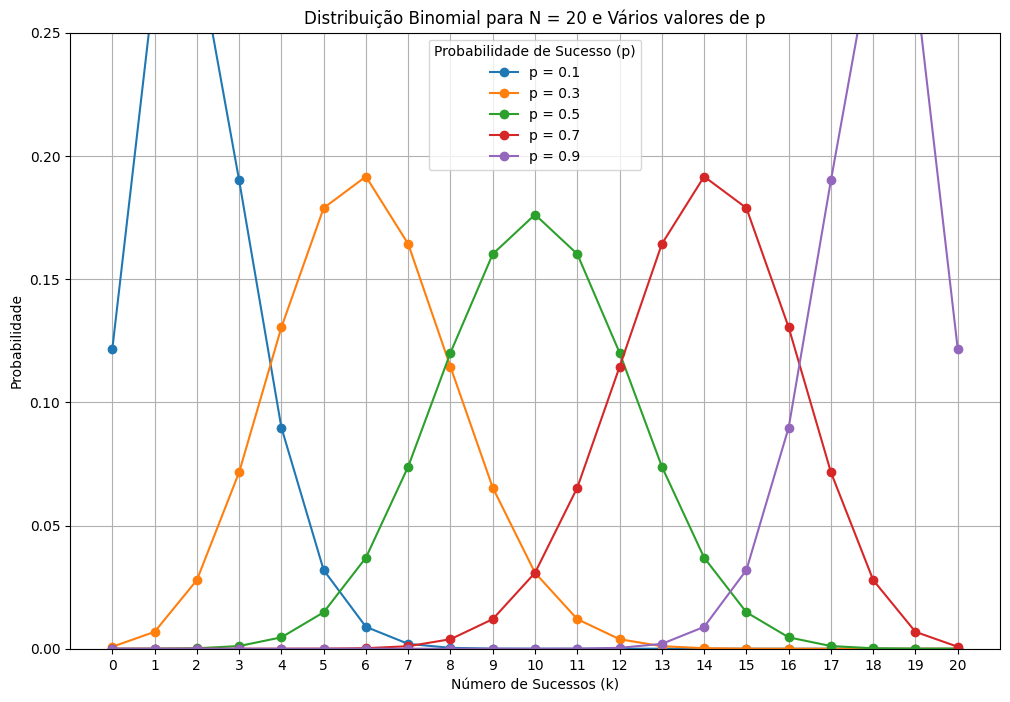

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Definindo os parâmetros
N = 20  # Número de ensaios
p_values = np.arange(0.1, 1.0, 0.2)  # Variando p de 0 a 1 em incrementos de 0.1
k = np.arange(0, N + 1)  # Possíveis números de sucessos

# Criando a figura
plt.figure(figsize=(12, 8))

# Loop para cada valor de p
for p in p_values:
    # Calculando as probabilidades binomiais
    probabilities = binom.pmf(k, N, p)

    # Plotando
    plt.plot(k, probabilities, marker='o', label=f'p = {p:.1f}')

# Configurando o gráfico
plt.title('Distribuição Binomial para N = 20 e Vários valores de p')
plt.xlabel('Número de Sucessos (k)')
plt.ylabel('Probabilidade')
plt.xticks(k)
plt.grid()
plt.legend(title='Probabilidade de Sucesso (p)')
plt.ylim(0, 0.25)
plt.show()


# **Distribuição Binomial Negativa**

Plote uma distribuição binomial negativa em função do parãmetro k (número de sucessos)

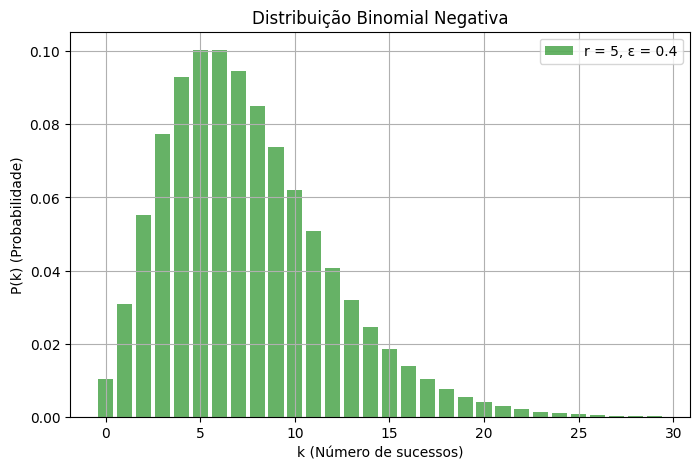

In [ ]:
# Distribuição binomial sendo: k o número de sucessos e ε a probabilidade de sucesso

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom


def binomial_negativa(k, r, epsilon):
    """
    Função para a distribuição binomial negativa.
    k: número de sucessos (variável aleatória).
    r: número de falhas antes de atingir k sucessos.
    epsilon: probabilidade de sucesso.
    """
    return nbinom.pmf(k, r, epsilon)

# parâmetros
r = 5       # Número de falhas antes de k sucessos
epsilon = 0.4  # Probabilidade de sucesso
k = np.arange(0, 30)  # Faixa de k (número de sucessos)

# Calcular a binomial negativa para diferentes valores de k
pmf = binomial_negativa(k, r, epsilon)

# Plotar o gráfico
plt.figure(figsize=(8, 5))
plt.bar(k, pmf, color='green', alpha=0.6, label=f'r = {r}, ε = {epsilon}')
plt.xlabel('k (Número de sucessos)')
plt.ylabel('P(k) (Probabilidade)')
plt.title('Distribuição Binomial Negativa')
plt.legend()
plt.grid(True)
plt.show()


# **Distribuição Gaussiana**

Faça um gráfico da distribuição gaussiana

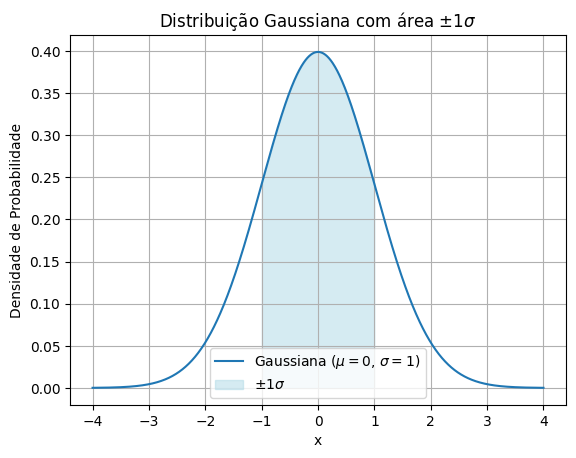

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definindo os parâmetros da Gaussiana
mu = 0       # média
sigma = 1    # desvio padrão

# Gerando valores x para a função Gaussiana
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Criando o gráfico
plt.plot(x, y, label='Gaussiana ($\mu=0$, $\sigma=1$)')
plt.fill_between(x, y, where=((x >= mu - sigma) & (x <= mu + sigma)), color='lightblue', alpha=0.5, label='$\pm 1\sigma$')

# Personalizando o gráfico
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Gaussiana com área $\pm 1\sigma$')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


# **Gaussiana com fit**

Gerar dados gaussianos e depois fitar a gaussiana

[2.41922431 0.29646319]
[[9.01362110e-05 6.36392258e-09]
 [6.36392258e-09 6.01071114e-05]]
[0.00949401 0.00775288]


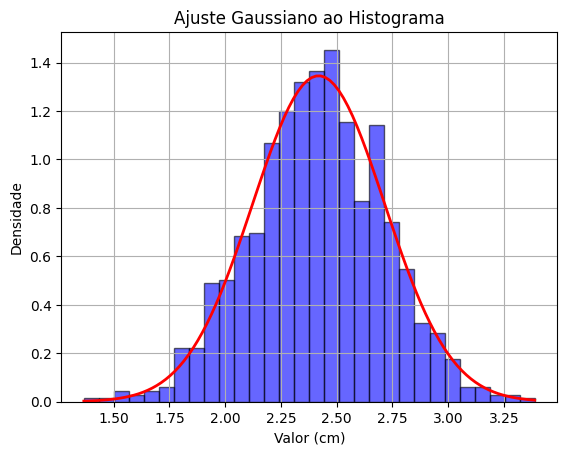

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Função gaussiana
def gaussiana(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Gerar dados a partir de uma distribuição normal
data = np.random.normal(loc=2.4, scale=0.3, size=1000)

# Criar histograma dos dados
hist, bin_edges = np.histogram(data, bins=30, density=True)

# Usar os centros dos bins para o ajuste
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Ajustar a função gaussiana aos dados
#popt, _ = curve_fit(gaussiana, bin_centers, hist)
popt, pcov = curve_fit(gaussiana, bin_centers, hist)
perr = np.sqrt(np.diag(pcov)) # error padrão dos parâmetros ajustados
print(popt)
print(pcov)
print(perr)

# Gerar curva gaussiana ajustada
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 100)
y_fit = gaussiana(x_fit, *popt)

# Plotar o histograma e o ajuste gaussiano
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.plot(x_fit, y_fit, color='red', linewidth=2)
plt.title('Ajuste Gaussiano ao Histograma')
plt.xlabel('Valor (cm)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

# **Distribuição de qui-quadrado**

Fazer um programa que gera distribuições de qui-quadrado (para 2, 5 e 10 graus de liberdade) e calcula os valores da média

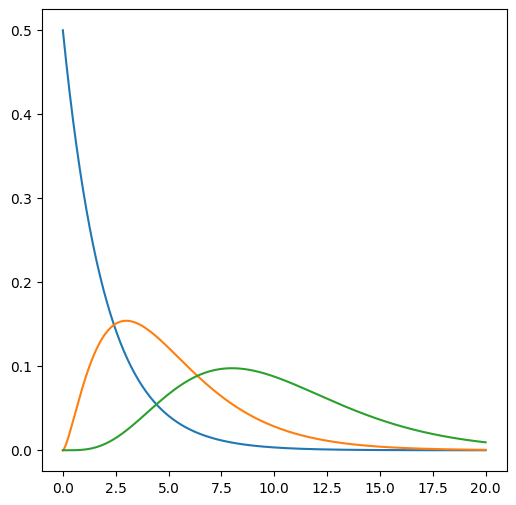

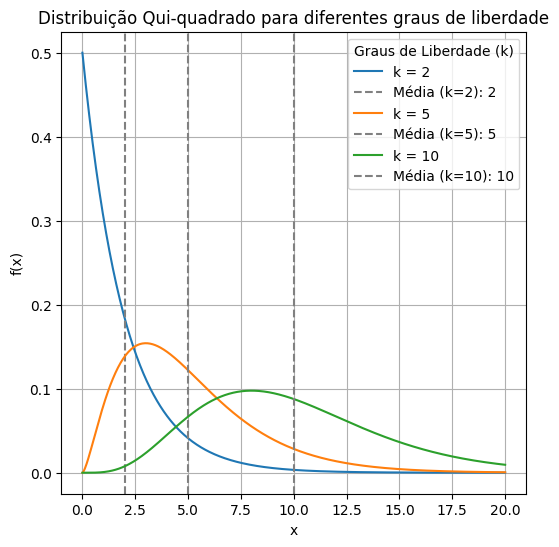

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Valores para diferentes graus de liberdade
k_values = [ 2, 5, 10]  # graus de liberdade
x = np.linspace(0, 20, 500)  # valores de x para o gráfico

# Criar o gráfico
plt.figure(figsize=(6, 6))
for k in k_values:
    plt.plot(x, chi2.pdf(x, k), label=f'k = {k}')


plt.figure(figsize=(6, 6))
for k in k_values:
    # Calcular e plotar a distribuição
    plt.plot(x, chi2.pdf(x, k), label=f'k = {k}')

    # Calcular a média da distribuição qui-quadrado, que é igual a k
    mean = k
    plt.axvline(mean, color='gray', linestyle='--', label=f'Média (k={k}): {mean}')

# Configurações do gráfico
plt.title("Distribuição Qui-quadrado para diferentes graus de liberdade")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(title="Graus de Liberdade (k)")
plt.grid(True)
plt.show()





# **Distribuição Lorentziana**

Plote uma distribuição Lorentziana usando a expressão dada abaixo

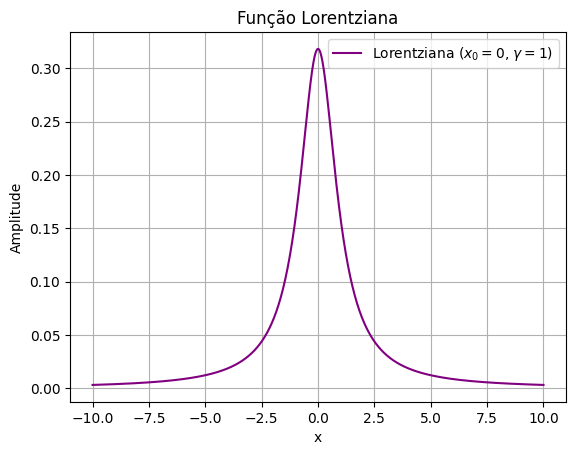

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros da Lorentziana
x0 = 0       # posição central
gamma = 1    # largura à meia-altura

# Gerando valores x para a função Lorentziana
x = np.linspace(x0 - 10*gamma, x0 + 10*gamma, 1000)
y = 1 / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# Criando o gráfico
plt.plot(x, y, label='Lorentziana ($x_0=0$, $\gamma=1$)', color='purple')

# Personalizando o gráfico
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Função Lorentziana')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


# **Atividade 3: Ajustes por método dos mínimos quadrados**

# Dados os valores fornecidos abaixo, faça um código que ajuste uma reta pelo método dos mínimos quadrados



/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     625.0
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000140
Time:                        00:53:02   Log-Likelihood:                 5.9587
No. Observations:                   5   AIC:                            -7.917
Df Residuals:                       3   BIC:                            -8.699
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3900      0.099     13.970      0.0

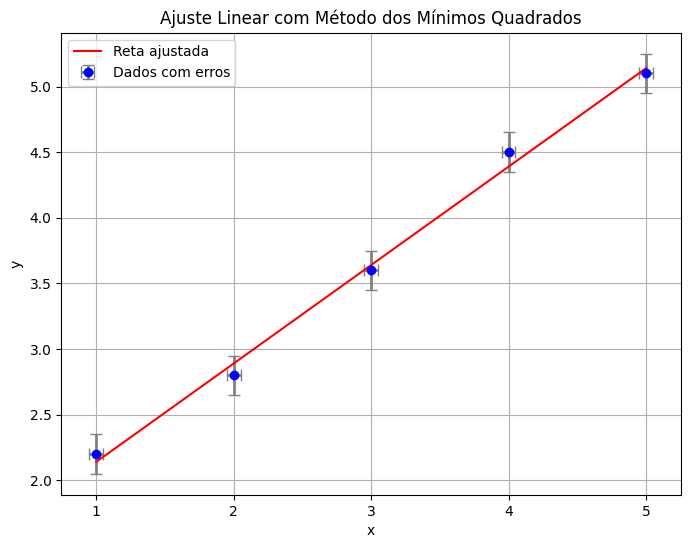

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados fornecidos
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1])
err_x_data = np.array([0.05, 0.05, 0.05, 0.05, 0.05])  # Incertezas em x (não usadas diretamente)
err_y_data = np.array([0.15, 0.15, 0.15, 0.15, 0.15])  # Incertezas em y

# Adiciona uma constante para o intercepto
X = sm.add_constant(x_data)

# Calcula os pesos como o inverso do quadrado dos erros em y
weights = 1 / err_y_data**2

# Cria o modelo de mínimos quadrados ponderados
model = sm.WLS(y_data, X, weights=weights)
results = model.fit()

# Obtém os parâmetros de ajuste (intercepto e inclinação)
intercept, slope = results.params

# Exibe o resumo dos resultados
print(results.summary())

# Gera valores ajustados para a reta
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = intercept + slope * x_fit

# Gráfico
plt.figure(figsize=(8, 6))

# Plota os pontos de dados com barras de erro
plt.errorbar(x_data, y_data, xerr=err_x_data, yerr=err_y_data, fmt='o', label='Dados com erros', color='blue', ecolor='gray', elinewidth=2, capsize=4)

# Plota a reta ajustada
plt.plot(x_fit, y_fit, label='Reta ajustada', color='red')

# Labels e título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Linear com Método dos Mínimos Quadrados')
plt.legend()
plt.grid(True)
plt.show()


# **Atividade 4: Usando o critério de Akaike para decidir qual o melhor modelo que descreve os dados**


Usando os dados abaixo, faça um código que ajusta um polinomio de grau 2, 3, 4 ou 5 e aplique o critério de Akaike para decidir qual o melhor grau do polinômio.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import *;

def update2(order =4):
    x = np.asarray([1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.asarray([3, 29, 129, 320, 781, 1700, 2901, 4000, 7981])
    sy = np.asarray([10, 10,  10,   50, 100,  100, 290, 400,  500])


    p = np.polyfit(x,y,order,w=1/sy)
    plt.errorbar(x,y,yerr = sy, fmt='o')
    xfino = np.linspace(x.min(),x.max()*1.2,100)

    plt.plot(xfino,np.polyval(p,xfino),'r')
    plt.xlim(xmin=0,xmax=10)
    plt.ylim(ymin=-100,ymax=10000)

    chi2 = ((( np.polyval(p,x) - y ) / sy )**2).sum()
    aic = 2*(order + chi2)

    plt.text(-4,90, 'order: %d  \nchi2: %.2f\nchi2_esperado: %.2f\n\nAIC: %.2f'%(order, chi2,9-order,aic))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    plt.clf() # Limpa os eixos
    plt.cla() # Limpa a figura
    plt.close(); # Fecha o gráfico

interact(update2,order=(1,5,1));

interactive(children=(IntSlider(value=4, description='order', max=5, min=1), Output()), _dom_classes=('widget-…